## Create the machine learning algorithm



### Import the relevant libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
records = []

npz = np.load('Audiobooks_data_train.npz')

train_inputs = npz['inputs'].astype(float)
train_targets = npz['targets'].astype(int)

npz = np.load('Audiobooks_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

npz = np.load('Audiobooks_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

In [3]:
train_inputs.shape

(3579, 10)

In [4]:
test_targets.shape

(448,)

In [5]:
train_targets

array([0, 1, 1, ..., 1, 1, 0])

## Model

In [106]:
from tensorflow import keras
from tensorflow.keras import layers

config = {
    'input_size': [train_inputs.shape[1]],
    'hidden_layer_size': 64,
    'output_size': 1,
    'learning_rate': 0.00003,
    'batch_size': 64,
    'epoch_size': 200
}

model = keras.Sequential([
    layers.Dense(config['hidden_layer_size'], activation='relu', input_shape=config['input_size']),
    # layers.BatchNormalization(),

    layers.Dense(config['hidden_layer_size'], activation='relu'),    
    # layers.BatchNormalization(),

    layers.Dense(config['output_size'], activation='sigmoid')
])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=config['learning_rate'])
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

/opt/anaconda3/envs/py3-TF2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3)   #patience: 可以容忍至多3個上下震盪的val loss，防止overfitting

# val_loss 開始上下震盪 -> Overfitting，使用EarlyStopping()
history = model.fit(
    train_inputs,
    train_targets,
    batch_size=config['batch_size'],
    epochs=config['epoch_size'],
    callbacks=[early_stopping],
    validation_data=(validation_inputs, validation_targets),
    verbose=2
)


Epoch 1/200
56/56 - 1s - 15ms/step - binary_accuracy: 0.5781 - loss: 0.6715 - val_binary_accuracy: 0.5817 - val_loss: 0.6687
Epoch 2/200
56/56 - 0s - 746us/step - binary_accuracy: 0.6038 - loss: 0.6615 - val_binary_accuracy: 0.6174 - val_loss: 0.6581
Epoch 3/200
56/56 - 0s - 675us/step - binary_accuracy: 0.6329 - loss: 0.6521 - val_binary_accuracy: 0.6421 - val_loss: 0.6478
Epoch 4/200
56/56 - 0s - 691us/step - binary_accuracy: 0.6521 - loss: 0.6432 - val_binary_accuracy: 0.6600 - val_loss: 0.6382
Epoch 5/200
56/56 - 0s - 730us/step - binary_accuracy: 0.6695 - loss: 0.6347 - val_binary_accuracy: 0.6779 - val_loss: 0.6289
Epoch 6/200
56/56 - 0s - 2ms/step - binary_accuracy: 0.6829 - loss: 0.6266 - val_binary_accuracy: 0.7025 - val_loss: 0.6201
Epoch 7/200
56/56 - 0s - 713us/step - binary_accuracy: 0.6918 - loss: 0.6187 - val_binary_accuracy: 0.7136 - val_loss: 0.6112
Epoch 8/200
56/56 - 0s - 680us/step - binary_accuracy: 0.7005 - loss: 0.6111 - val_binary_accuracy: 0.7293 - val_loss: 0.

<Axes: title={'center': 'Accuracy'}>

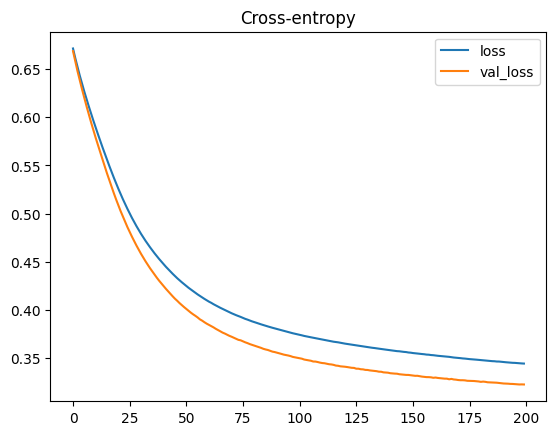

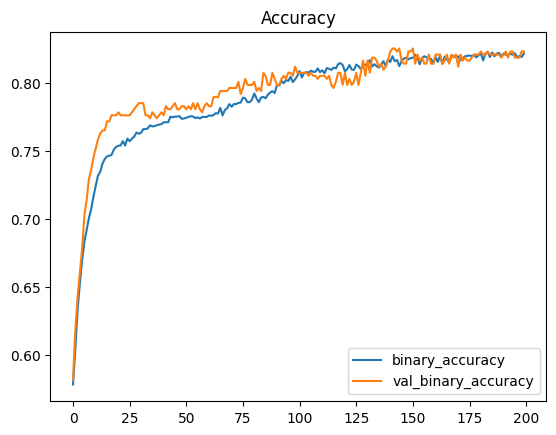

In [108]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

## Test

In [109]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - binary_accuracy: 0.8016 - loss: 0.3597
Test loss: 0.37. Test accuracy: 79.46%


## Recording Hyperparameter Tuning

In [110]:
records.append({
    'hidden_layer_size': config['hidden_layer_size'],
    'batch': config['batch_size'],
    'epoch': config['epoch_size'],
    'test_loss': round(test_loss, 2), 
    'test_accuracy': round(test_accuracy, 3)
})

In [111]:
import json

json_records = json.dumps(records)
with open('records.json', 'w') as f:
    f.write(json_records)

# Load the JSON string back into a dictionary
records_dict = json.loads(json_records)

test_accuracies = [record['test_accuracy'] for record in records_dict]
max_accuracy = max(test_accuracies)

highest_accuracy_indices = [record for record in records_dict if record['test_accuracy'] == max_accuracy]

print(highest_accuracy_indices)


[{'hidden_layer_size': 64, 'batch': 64, 'epoch': 200, 'test_loss': 0.37, 'test_accuracy': 0.804}]
